## Python Implementation Demo - Vanishing Gradient

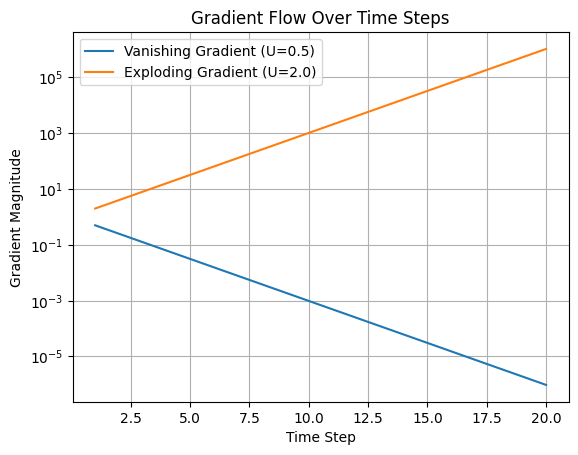

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Number of time steps
T = 20

# Try for both vanishing and exploding cases
Us = [0.5, 2.0]
labels = ["Vanishing Gradient", "Exploding Gradient"]

for U, label in zip(Us, labels):
    grads = []
    grad = 1.0  # dL/dh_T = 1

    for t in range(T):
        grad *= U  # backprop step through time
        grads.append(grad)

    plt.plot(range(1, T + 1), grads, label=f"{label} (U={U})")

plt.xlabel("Time Step")
plt.ylabel("Gradient Magnitude")
plt.title("Gradient Flow Over Time Steps")
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

When
U=2.0, the gradient grows exponentially → Exploding

When
U=0.5, it shrinks exponentially → Vanishing

## Python Implementation - LSTM

In [ ]:
import numpy as np

# Sigmoid and tanh
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

# Input and previous states
x_t = 1.0
h_prev = 0.5
c_prev = 0.0

# Weights and biases (simplified)
W_f = W_i = W_c = W_o = 1.0
b_f = b_i = b_c = b_o = 0.0

# Concatenate [h_prev, x_t]
concat = h_prev + x_t  # Since W = 1, we can simplify to addition

# 1. Forget gate
f_t = sigmoid(W_f * concat + b_f)

# 2. Input gate
i_t = sigmoid(W_i * concat + b_i)

# Candidate cell state
c_hat_t = tanh(W_c * concat + b_c)

# 3. New cell state
c_t = f_t * c_prev + i_t * c_hat_t

# 4. Output gate
o_t = sigmoid(W_o * concat + b_o)

# 5. New hidden state
h_t = o_t * tanh(c_t)

print(f"Forget gate f_t: {f_t:.4f}")
print(f"Input gate i_t: {i_t:.4f}")
print(f"Candidate c~_t: {c_hat_t:.4f}")
print(f"New Cell state c_t: {c_t:.4f}")
print(f"Output gate o_t: {o_t:.4f}")
print(f"New Hidden state h_t: {h_t:.4f}")

Forget gate f_t: 0.8176
Input gate i_t: 0.8176
Candidate c~_t: 0.9051
New Cell state c_t: 0.7400
Output gate o_t: 0.8176
New Hidden state h_t: 0.5144


## Custom LSTM from Scratch

In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

class MiniLSTM:
    def __init__(self):
        # Weight matrices and biases for 1-unit LSTM (input + hidden concatenated = 2)
        self.W_f = np.array([[1.0, 1.0]])  # forget gate weights
        self.W_i = np.array([[1.0, 1.0]])  # input gate weights
        self.W_c = np.array([[1.0, 1.0]])  # candidate cell state weights
        self.W_o = np.array([[1.0, 1.0]])  # output gate weights

        self.b_f = np.array([0.0])
        self.b_i = np.array([0.0])
        self.b_c = np.array([0.0])
        self.b_o = np.array([0.0])

    def step(self, x_t, h_prev, c_prev):
        # Convert scalars to 1D numpy arrays
        x_t = np.array([x_t]) if np.isscalar(x_t) else x_t
        h_prev = np.array([h_prev]) if np.isscalar(h_prev) else h_prev

        # Concatenate h_prev and x_t
        concat = np.concatenate((h_prev, x_t))  # shape (2,)

        # Gates
        f_t = sigmoid(self.W_f @ concat + self.b_f)  # forget gate
        i_t = sigmoid(self.W_i @ concat + self.b_i)  # input gate
        c_hat_t = tanh(self.W_c @ concat + self.b_c)  # candidate cell state
        c_t = f_t * c_prev + i_t * c_hat_t  # updated cell state
        o_t = sigmoid(self.W_o @ concat + self.b_o)  # output gate
        h_t = o_t * tanh(c_t)  # updated hidden state

        return h_t, c_t

# Initialize model
model = MiniLSTM()
h, c = 0.0, 0.0  # initial hidden and cell states

# Sample input sequence
sequence = [0.1, 0.2, 0.3]

# Run through sequence
for idx, x in enumerate(sequence):
    h, c = model.step(x, h, c)
    print(f"Step {idx+1}: x={x:.1f}, h={h.item():.4f}, c={c.item():.4f}")

Step 1: x=0.1, h=0.0274, c=0.0523
Step 2: x=0.2, h=0.0848, c=0.1536
Step 3: x=0.3, h=0.1786, c=0.3097


## Visualizing internals over multiple time steps

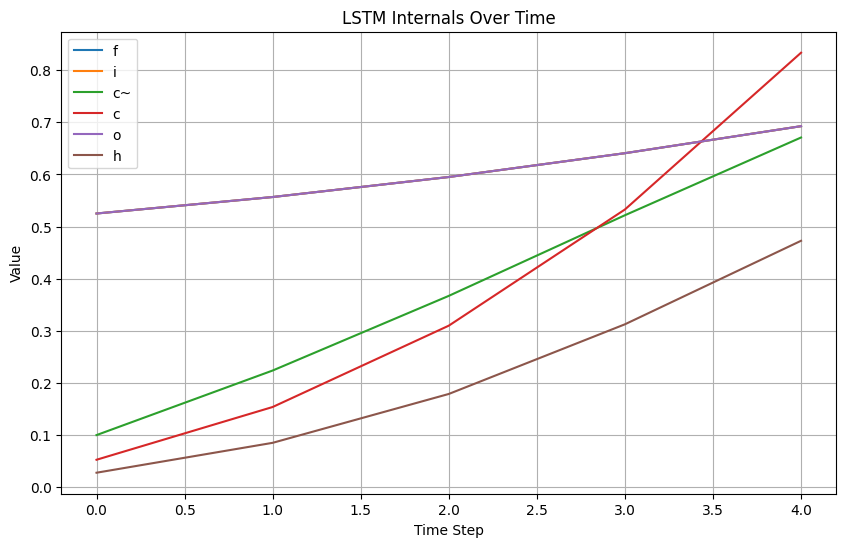

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

class MiniLSTM:
    def __init__(self):
        # Weight matrices and biases for 1-unit LSTM
        self.W_f = np.array([[1.0, 1.0]])
        self.W_i = np.array([[1.0, 1.0]])
        self.W_c = np.array([[1.0, 1.0]])
        self.W_o = np.array([[1.0, 1.0]])

        self.b_f = np.array([0.0])
        self.b_i = np.array([0.0])
        self.b_c = np.array([0.0])
        self.b_o = np.array([0.0])

    def step(self, x_t, h_prev, c_prev):
        # Ensure input is in array form
        x_t = np.array([x_t]) if np.isscalar(x_t) else x_t
        h_prev = np.array([h_prev]) if np.isscalar(h_prev) else h_prev

        concat = np.concatenate((h_prev, x_t))
        f_t = sigmoid(self.W_f @ concat + self.b_f)
        i_t = sigmoid(self.W_i @ concat + self.b_i)
        c_hat_t = tanh(self.W_c @ concat + self.b_c)
        c_t = f_t * c_prev + i_t * c_hat_t
        o_t = sigmoid(self.W_o @ concat + self.b_o)
        h_t = o_t * tanh(c_t)

        return h_t, c_t

class DebugLSTM(MiniLSTM):
    def __init__(self):
        super().__init__()
        self.history = {'f': [], 'i': [], 'c~': [], 'c': [], 'o': [], 'h': []}

    def step(self, x_t, h_prev, c_prev):
        # Ensure input is in array form
        x_t = np.array([x_t]) if np.isscalar(x_t) else x_t
        h_prev = np.array([h_prev]) if np.isscalar(h_prev) else h_prev

        concat = np.concatenate((h_prev, x_t))
        f_t = sigmoid(self.W_f @ concat + self.b_f)
        i_t = sigmoid(self.W_i @ concat + self.b_i)
        c_hat_t = tanh(self.W_c @ concat + self.b_c)
        c_t = f_t * c_prev + i_t * c_hat_t
        o_t = sigmoid(self.W_o @ concat + self.b_o)
        h_t = o_t * tanh(c_t)

        # Store values for plotting
        self.history['f'].append(f_t.item())
        self.history['i'].append(i_t.item())
        self.history['c~'].append(c_hat_t.item())
        self.history['c'].append(c_t.item())
        self.history['o'].append(o_t.item())
        self.history['h'].append(h_t.item())

        return h_t, c_t

# Run
model = DebugLSTM()
h, c = 0.0, 0.0
sequence = [0.1, 0.2, 0.3, 0.4, 0.5]

for x in sequence:
    h, c = model.step(x, h, c)

# Plotting
plt.figure(figsize=(10, 6))
for key in model.history:
    plt.plot(model.history[key], label=key)
plt.legend()
plt.title("LSTM Internals Over Time")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.grid(True)
plt.show()

This shows how:

Forget/input gates evolve

Cell state grows/decays

Output/hidden reflect memory

## Real NLP Task using LSTM – Sentiment Analysis (Easy Version)

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Load IMDB data
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

# Padding
X_train = pad_sequences(X_train, maxlen=200)
X_test = pad_sequences(X_test, maxlen=200)

# Model
model = Sequential()
model.add(Embedding(5000, 32, input_length=200))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train
model.fit(X_train, y_train, epochs=2, batch_size=64, validation_split=0.2)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
313/313 ━━━━━━━━━━━━━━━━━━━━ 59s 179ms/step - accuracy: 0.6054 - loss: 0.6320 - val_accuracy: 0.8410 - val_loss: 0.3685
Epoch 2/2
313/313 ━━━━━━━━━━━━━━━━━━━━ 78s 167ms/step - accuracy: 0.8770 - loss: 0.3031 - val_accuracy: 0.8364 - val_loss: 0.3857


In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Load word index
word_index = imdb.get_word_index()

# Offset by 3 (Keras reserves index 0, 1, 2 for special tokens)
word_index = {k: (v + 3) for k, v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3

# Inverse mapping (optional, for decoding)
index_word = {v: k for k, v in word_index.items()}

# Function to convert text to integer-encoded sequence
def encode_text(text):
    tokens = text.lower().split()
    encoded = [1]  # <START>
    for word in tokens:
        idx = word_index.get(word, 2)  # 2 = <UNK>
        encoded.append(idx)
    return pad_sequences([encoded], maxlen=200)

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Sample text
sample_review = "This movie was absolutely fantastic and I loved every moment."

# Encode and pad
encoded_review = encode_text(sample_review)

# Predict sentiment
prediction = model.predict(encoded_review)
print(f"Predicted sentiment: {'Positive' if prediction[0][0] > 0.5 else 'Negative'} ({prediction[0][0]:.4f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
Predicted sentiment: Positive (0.8179)
